### Data Loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

df = pd.read_csv('./listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


***

### Data Understanding Part I
In a first step, I try to familiarise myself with the data set. What are the features that interest me? What is the overall quality?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [3]:
# As we can see above, the data has a good overall quality with little missing values
# Number of NULL: 0 missing values
no_nulls = set(df.columns[df.isnull().mean()==0])
print(no_nulls)

{'is_location_exact', 'minimum_nights', 'instant_bookable', 'cancellation_policy', 'price', 'neighbourhood_cleansed', 'calendar_updated', 'number_of_reviews', 'smart_location', 'listing_url', 'accommodates', 'host_is_superhost', 'host_has_profile_pic', 'availability_90', 'requires_license', 'room_type', 'description', 'name', 'experiences_offered', 'last_scraped', 'host_url', 'country', 'availability_60', 'calendar_last_scraped', 'state', 'bed_type', 'country_code', 'street', 'host_since', 'host_picture_url', 'host_verifications', 'host_id', 'latitude', 'longitude', 'require_guest_phone_verification', 'calculated_host_listings_count', 'availability_30', 'host_listings_count', 'id', 'host_total_listings_count', 'availability_365', 'host_identity_verified', 'scrape_id', 'amenities', 'maximum_nights', 'extra_people', 'host_thumbnail_url', 'require_guest_profile_picture', 'picture_url', 'host_name', 'guests_included'}


In [4]:
# Number of NULL: most missing values
most_missing_values = set(df.columns[df.isnull().mean()>0.75])
print(most_missing_values)

{'weekly_price', 'license', 'square_feet', 'neighbourhood_group_cleansed', 'jurisdiction_names', 'monthly_price', 'has_availability'}


In [5]:
# Number of duplicates
print(df.drop(['id', 'scrape_id', 'host_id'], axis=1).duplicated().sum())

0


In [6]:
# Number of unique values
print(df.nunique().sort_values())

neighbourhood_group_cleansed       0
has_availability                   0
jurisdiction_names                 0
license                            0
country                            1
                                ... 
listing_url                     3585
longitude                       3585
latitude                        3585
picture_url                     3585
id                              3585
Length: 95, dtype: int64


***

### Data Preparation
The following steps were made in this section:
 - drop columns with missing values higher than 75%
 - choosing the columns of interest and let the others drop
 - after that, I had to convert 'price' from object to float
 - I deleted two outliers in the column 'price'
 - there are still missing values in 'zipcode' and 'property_type' so I decided to delete the single rows (41 rows out of 3583)

In [7]:
# Drop the columns with a lot of missing values (higher than 75%)
df = df.drop(most_missing_values,axis=1)

In [8]:
# Having a look on the object-type featueres in df
list(df.select_dtypes(include=['object']).columns)

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'calendar_updated',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'requires_license',
 'instant_bookable',
 'cancellatio

In [9]:
# Choosing the features of interest from above
df_object_columns = ['bed_type',
 'cancellation_policy',
 'zipcode',
 'country',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'instant_bookable',
 'property_type',
 'neighbourhood_cleansed',
 'room_type']

In [10]:
# Having a look on the other types
list(df.select_dtypes(exclude=['object']).columns)

['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month']

In [11]:
# Also in this case I am choosing the features of interest
# I did take 'price' to the nonobjects
df_nonobject_columns = ['accommodates',
 'availability_30',
 'availability_365',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'id',
 'maximum_nights',
 'minimum_nights',
 'number_of_reviews',
 'price',
 'review_scores_rating']

In [12]:
df[df_nonobject_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accommodates          3585 non-null   int64  
 1   availability_30       3585 non-null   int64  
 2   availability_365      3585 non-null   int64  
 3   bathrooms             3571 non-null   float64
 4   bedrooms              3575 non-null   float64
 5   beds                  3576 non-null   float64
 6   guests_included       3585 non-null   int64  
 7   id                    3585 non-null   int64  
 8   maximum_nights        3585 non-null   int64  
 9   minimum_nights        3585 non-null   int64  
 10  number_of_reviews     3585 non-null   int64  
 11  price                 3585 non-null   object 
 12  review_scores_rating  2772 non-null   float64
dtypes: float64(4), int64(8), object(1)
memory usage: 364.2+ KB


In [13]:
# Since most of the values are valid, it makes sense to fill the remaining ones with the mean
# But first, the 'price'-feature needs to become a float
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].astype(float)
print(df['price'])

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64


<ipython-input-13-d6d0a14808e6>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','')


In [14]:
df['price'].sort_values(ascending = False)

2285    4000.0
3055    3000.0
793     1400.0
2204    1372.0
1950    1345.0
         ...  
777       22.0
3450      20.0
471       20.0
3468      11.0
2033      10.0
Name: price, Length: 3585, dtype: float64

In [15]:
df.drop(df.loc[df['price']==4000].index, inplace=True)
df.drop(df.loc[df['price']==3000].index, inplace=True)

In [16]:
# Filling in the means of the columns
fill_mean = lambda col: col.fillna(col.mean())
df_new = df[df_nonobject_columns].apply(fill_mean, axis=0)

In [17]:
df_new[df_nonobject_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3583 entries, 0 to 3584
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accommodates          3583 non-null   int64  
 1   availability_30       3583 non-null   int64  
 2   availability_365      3583 non-null   int64  
 3   bathrooms             3583 non-null   float64
 4   bedrooms              3583 non-null   float64
 5   beds                  3583 non-null   float64
 6   guests_included       3583 non-null   int64  
 7   id                    3583 non-null   int64  
 8   maximum_nights        3583 non-null   int64  
 9   minimum_nights        3583 non-null   int64  
 10  number_of_reviews     3583 non-null   int64  
 11  price                 3583 non-null   float64
 12  review_scores_rating  3583 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 391.9 KB


In [18]:
# After the nonobjects features, let's have a look at the objects
df[df_object_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3583 entries, 0 to 3584
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   bed_type                3583 non-null   object
 1   cancellation_policy     3583 non-null   object
 2   zipcode                 3545 non-null   object
 3   country                 3583 non-null   object
 4   host_has_profile_pic    3583 non-null   object
 5   host_identity_verified  3583 non-null   object
 6   host_is_superhost       3583 non-null   object
 7   instant_bookable        3583 non-null   object
 8   property_type           3580 non-null   object
 9   neighbourhood_cleansed  3583 non-null   object
 10  room_type               3583 non-null   object
dtypes: object(11)
memory usage: 335.9+ KB


In [19]:
# The featurs above look good, so we can concatenate them with the nonobjects ones
df_clean = pd.concat([df_new[df_nonobject_columns],df[df_object_columns]],axis=1)

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3583 entries, 0 to 3584
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accommodates            3583 non-null   int64  
 1   availability_30         3583 non-null   int64  
 2   availability_365        3583 non-null   int64  
 3   bathrooms               3583 non-null   float64
 4   bedrooms                3583 non-null   float64
 5   beds                    3583 non-null   float64
 6   guests_included         3583 non-null   int64  
 7   id                      3583 non-null   int64  
 8   maximum_nights          3583 non-null   int64  
 9   minimum_nights          3583 non-null   int64  
 10  number_of_reviews       3583 non-null   int64  
 11  price                   3583 non-null   float64
 12  review_scores_rating    3583 non-null   float64
 13  bed_type                3583 non-null   object 
 14  cancellation_policy     3583 non-null   

In [21]:
# The last step is to delete the remaining NULLs
df_clean = df_clean.dropna(subset=['zipcode'], how='any')

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3545 entries, 0 to 3584
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accommodates            3545 non-null   int64  
 1   availability_30         3545 non-null   int64  
 2   availability_365        3545 non-null   int64  
 3   bathrooms               3545 non-null   float64
 4   bedrooms                3545 non-null   float64
 5   beds                    3545 non-null   float64
 6   guests_included         3545 non-null   int64  
 7   id                      3545 non-null   int64  
 8   maximum_nights          3545 non-null   int64  
 9   minimum_nights          3545 non-null   int64  
 10  number_of_reviews       3545 non-null   int64  
 11  price                   3545 non-null   float64
 12  review_scores_rating    3545 non-null   float64
 13  bed_type                3545 non-null   object 
 14  cancellation_policy     3545 non-null   

In [23]:
df_clean = df_clean.dropna(subset=['property_type'], how='any')

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3542 entries, 0 to 3584
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accommodates            3542 non-null   int64  
 1   availability_30         3542 non-null   int64  
 2   availability_365        3542 non-null   int64  
 3   bathrooms               3542 non-null   float64
 4   bedrooms                3542 non-null   float64
 5   beds                    3542 non-null   float64
 6   guests_included         3542 non-null   int64  
 7   id                      3542 non-null   int64  
 8   maximum_nights          3542 non-null   int64  
 9   minimum_nights          3542 non-null   int64  
 10  number_of_reviews       3542 non-null   int64  
 11  price                   3542 non-null   float64
 12  review_scores_rating    3542 non-null   float64
 13  bed_type                3542 non-null   object 
 14  cancellation_policy     3542 non-null   

***

### Data Understanding Part II
In this section, I first created some plots on price and its correlation with other floats or integer features. Then I examined the object-based categories and their relationship to price.

In [25]:
# After the first impression of the data, I guess it would be interesting having a focus on the feature 'price'.
df_clean['price'].describe()

count    3542.000000
mean      172.530774
std       125.678962
min        11.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      1400.000000
Name: price, dtype: float64

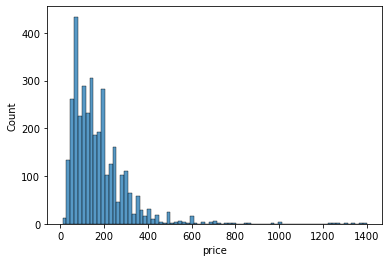

In [26]:
sns.histplot(df_clean['price'])
plt.show()

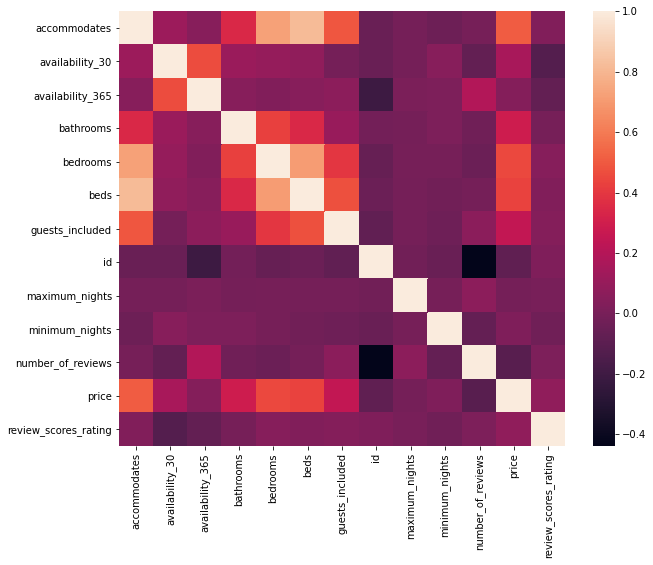

In [27]:
corrmatrix = df_clean.corr()
plt.subplots(figsize=(10,8)) 

sns.heatmap(corrmatrix, annot = False)
plt.show()

In [28]:
print(abs(corrmatrix['price']).sort_values(ascending = False))

price                   1.000000
accommodates            0.510439
bedrooms                0.454518
beds                    0.432514
bathrooms               0.287564
guests_included         0.248987
availability_30         0.157823
number_of_reviews       0.108398
review_scores_rating    0.083774
id                      0.081601
availability_365        0.040203
minimum_nights          0.023614
maximum_nights          0.006344
Name: price, dtype: float64


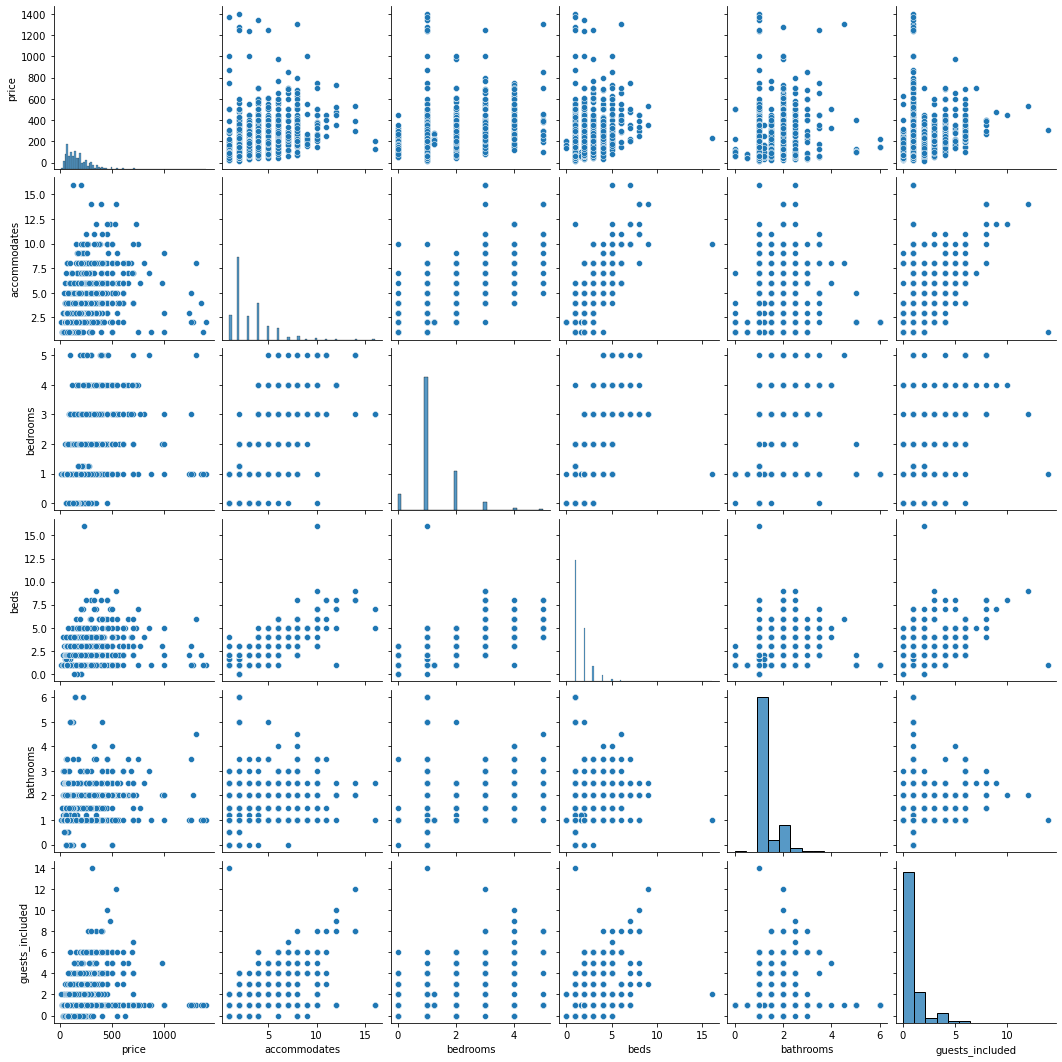

In [29]:
sns.pairplot(df_clean[['price', 'accommodates', 'bedrooms', 'beds', 'bathrooms','guests_included']])
plt.show()

In [30]:
# Not only the nonobjects correlations were interesting
# In the following, we will have a look at the object typed features
df_clean.groupby(['property_type']).size().sort_values()

property_type
Camper/RV             1
Guesthouse            1
Dorm                  2
Entire Floor          4
Villa                 6
Boat                 12
Other                17
Loft                 38
Bed & Breakfast      39
Townhouse            53
Condominium         229
House               558
Apartment          2582
dtype: int64

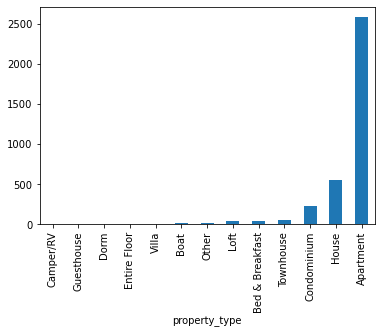

In [31]:
df_clean.groupby(['property_type']).size().sort_values().plot.bar()
plt.show()

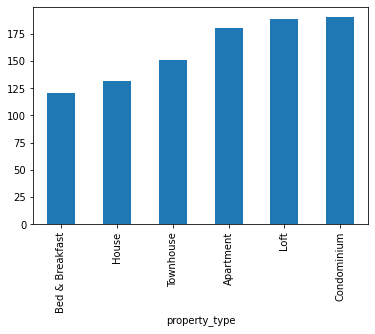

In [32]:
df_clean.groupby(['property_type']).mean()['price'].sort_values()[df_clean.groupby(['property_type']).size()>35].plot.bar(stacked=True)
plt.show()

In [33]:
df_clean.groupby(['zipcode']).size().sort_values()

zipcode
02472            1
02108 02111      1
02134-1704       1
02218            1
02186            1
02169            1
02142            1
02163            3
02141            3
02445            5
02467            5
02138            6
02139            6
02143            7
02446            8
02145           12
02110           12
02126           24
02121           29
02136           29
02132           37
02122           44
02109           51
02131           65
02108           72
02210           74
02124           80
02129           90
02111           99
02119          100
02113          101
02120          115
02125          129
02128          146
02115          169
02135          172
02127          180
02134          231
02114          231
02215          235
02118          247
02130          331
02116          387
dtype: int64

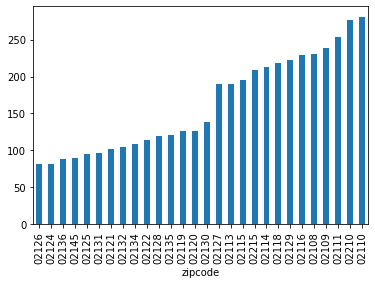

In [34]:
df_clean.groupby(['zipcode']).mean()['price'].sort_values()[df_clean.groupby(['zipcode']).size()>10].plot.bar(stacked=True)
plt.show()

In [35]:
df_clean.groupby(['neighbourhood_cleansed']).size().sort_values()

neighbourhood_cleansed
Leather District             5
Longwood Medical Area        7
Mattapan                    24
Bay Village                 24
Hyde Park                   31
West Roxbury                46
West End                    49
Roslindale                  55
Chinatown                   71
South Boston Waterfront     80
Charlestown                111
Mission Hill               123
North End                  140
Roxbury                    143
East Boston                146
Downtown                   169
South Boston               173
Brighton                   183
Beacon Hill                194
Allston                    257
Dorchester                 265
Fenway                     286
Back Bay                   298
South End                  322
Jamaica Plain              340
dtype: int64

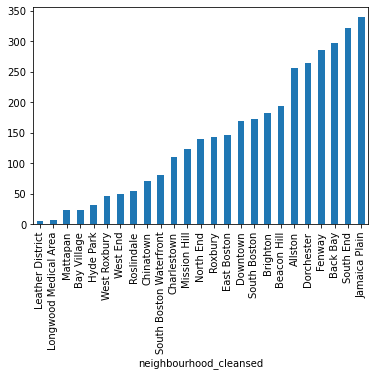

In [36]:
df_clean.groupby(['neighbourhood_cleansed']).size().sort_values().plot.bar()
plt.show()

In [37]:
df_clean.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values()

neighbourhood_cleansed
Mattapan                    75.125000
Hyde Park                   86.548387
Dorchester                  91.879245
Roslindale                  98.854545
West Roxbury               107.108696
Allston                    112.494163
Brighton                   118.540984
East Boston                119.684932
Mission Hill               122.154472
Jamaica Plain              138.382353
Roxbury                    147.111888
Longwood Medical Area      159.142857
South Boston               187.826590
North End                  197.071429
Charlestown                198.045045
South End                  204.381988
Fenway                     208.146853
West End                   209.591837
Beacon Hill                224.443299
Chinatown                  232.352113
Downtown                   237.704142
Back Bay                   241.738255
Leather District           253.600000
Bay Village                266.833333
South Boston Waterfront    275.037500
Name: price, dtype: float64

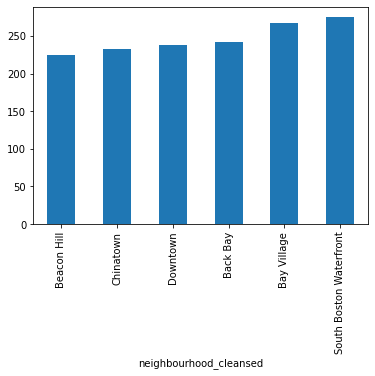

In [38]:
df_clean.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values()[(df_clean.groupby(['neighbourhood_cleansed'])['price'].mean()>220) & (df_clean.groupby(['neighbourhood_cleansed']).size()>20)].plot.bar(stacked=True)
plt.show()

In [39]:
# Create a boxplot of the most expensive neighbourhoods (including a minimum of 20 listings for each element).
neighbourhoods_columns = list(df_clean.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values()[(df_clean.groupby(['neighbourhood_cleansed'])['price'].mean()>220) & (df_clean.groupby(['neighbourhood_cleansed']).size()>20)].index)

In [40]:
neighbourhoods_columns

['Beacon Hill',
 'Chinatown',
 'Downtown',
 'Back Bay',
 'Bay Village',
 'South Boston Waterfront']

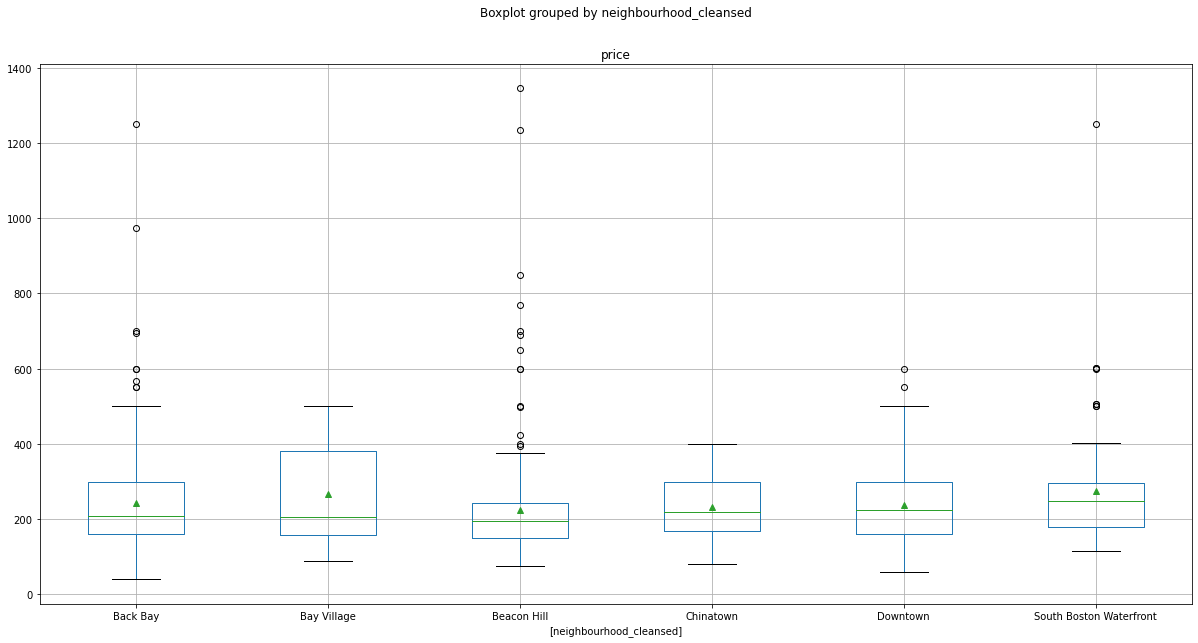

In [41]:
df_clean[df_clean['neighbourhood_cleansed'].isin(neighbourhoods_columns)][['neighbourhood_cleansed','price']].boxplot(by='neighbourhood_cleansed', figsize=(20,10), showmeans=True)
plt.show()

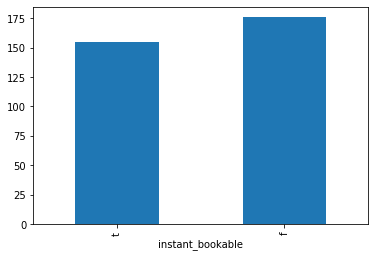

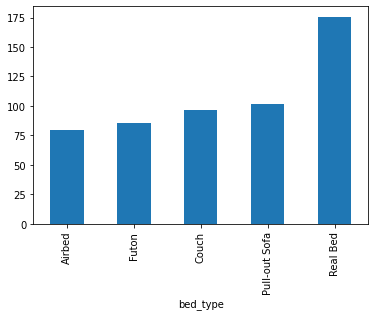

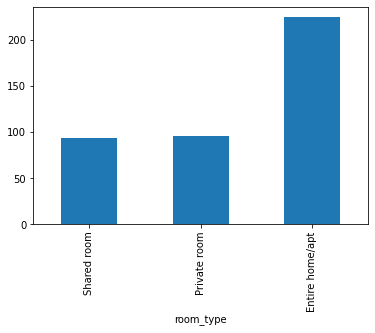

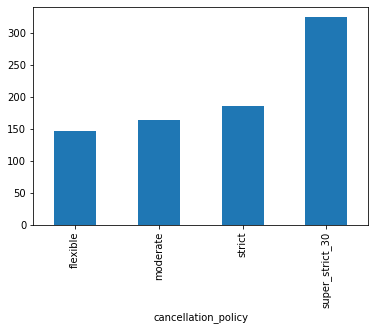

In [42]:
# Below I checked some more objects and their influence to the price.This will give me a good overview when building a model.

df_clean.groupby(['instant_bookable']).mean()['price'].sort_values().plot.bar(stacked=True)
plt.show()

df_clean.groupby(['bed_type']).mean()['price'].sort_values().plot.bar(stacked=True)
plt.show()

df_clean.groupby(['room_type']).mean()['price'].sort_values().plot.bar(stacked=True)
plt.show()

df_clean.groupby(['cancellation_policy']).mean()['price'].sort_values().plot.bar(stacked=True)
plt.show()

***

### Modelling
In this section I have created a model with the features of interest. A second model was created to see how the neighbourhood affects the R2 score.

In [43]:
# First we need to get dummies:
df_dummies = pd.get_dummies(df_clean[['neighbourhood_cleansed']])

In [44]:
# Concatenate with desired non-objects:
df_for_modeling = pd.concat([df_clean[['price','accommodates','bedrooms', 'beds', 'bathrooms','guests_included']], df_dummies], axis=1)

In [45]:
df_for_modeling

,price,accommodates,bedrooms,beds,bathrooms,guests_included,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,...,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury
0,250.0,4,2.0,3.0,1.5,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,65.0,2,1.0,1.0,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,65.0,2,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,79.0,2,1.0,2.0,1.5,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,75.0,2,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,69.0,3,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3581,150.0,2,1.0,1.0,1.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3582,198.0,4,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3583,65.0,2,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# creating a model for predicting price using: zipcode,accommodates,bedrooms,beds,bathrooms,guests_included
X = df_for_modeling.drop(['price'], axis=1)
y = df_for_modeling['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lm_model = LinearRegression(normalize=True)

lm_model.fit(X_train, y_train)

print(lm_model.score(X_test, y_test))

0.46115377040738303


In [47]:
# creating a model for predicting price using: accommodates,bedrooms,beds,bathrooms,guests_included
X2 = df_clean[['accommodates', 'bedrooms', 'beds', 'bathrooms', 'guests_included']].values
y2 = df_for_modeling[['price']].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
lm_model2 = LinearRegression(normalize=True)

lm_model2.fit(X2_train, y2_train)

print(lm_model2.score(X2_test, y2_test))

0.3180133213884575
